In [3]:
import pandas as pd 
import kaggle

In [4]:
kaggle.api.authenticate()

In [5]:
kaggle.api.dataset_download_files('vivekattri/california-wildfire-damage-2014-feb2025', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/vivekattri/california-wildfire-damage-2014-feb2025


In [6]:
file_path = "California Wildfire Damage.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Incident_ID                           100 non-null    object        
 1   Date                                  100 non-null    datetime64[ns]
 2   Location                              100 non-null    object        
 3   Area_Burned (Acres)                   100 non-null    int64         
 4   Homes_Destroyed                       100 non-null    int64         
 5   Businesses_Destroyed                  100 non-null    int64         
 6   Vehicles_Damaged                      100 non-null    int64         
 7   Injuries                              100 non-null    int64         
 8   Fatalities                            100 non-null    int64         
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64       
 10  Cau

In [14]:
print(df.isnull().sum())

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
Year                                    0
Month                                   0
dtype: int64


In [8]:
df['Location'].value_counts().to_frame().T

Location,Shasta County,Sonoma County,San Diego County,Butte County,Mendocino County,Napa Valley,Orange County,Riverside County,Los Angeles County,Santa Barbara County
count,14,12,12,11,11,10,9,8,7,6


In [9]:
# occurrences of wildfires seem to be limited to these 10 counties, despite there being 58 in the state

In [10]:
df.Cause.value_counts()

Cause
Human Activity    38
Lightning         31
Unknown           31
Name: count, dtype: int64

In [11]:
# causes are evenly distributed

In [12]:
df['Year'] = df['Date'].dt.year
print(f"Average incidents of wildfires per year: {df['Year'].value_counts().mean()}")

Average incidents of wildfires per year: 10.0


In [15]:
print(df[['Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged', 'Injuries', 'Fatalities', 'Estimated_Financial_Loss (Million $)']].describe())

       Area_Burned (Acres)  Homes_Destroyed  Businesses_Destroyed  \
count           100.000000       100.000000            100.000000   
mean          26531.460000       941.890000            251.570000   
std           14282.123824       543.019967            138.317761   
min             357.000000        18.000000              4.000000   
25%           15916.250000       501.000000            134.750000   
50%           25618.000000       908.500000            256.500000   
75%           39775.000000      1401.750000            371.000000   
max           49653.000000      1968.000000            493.000000   

       Vehicles_Damaged    Injuries  Fatalities  \
count        100.000000  100.000000  100.000000   
mean         150.330000   42.040000    9.930000   
std           88.471197   29.201467    5.682251   
min            5.000000    0.000000    0.000000   
25%           70.750000   16.000000    5.000000   
50%          150.500000   37.000000   10.000000   
75%          229.7500

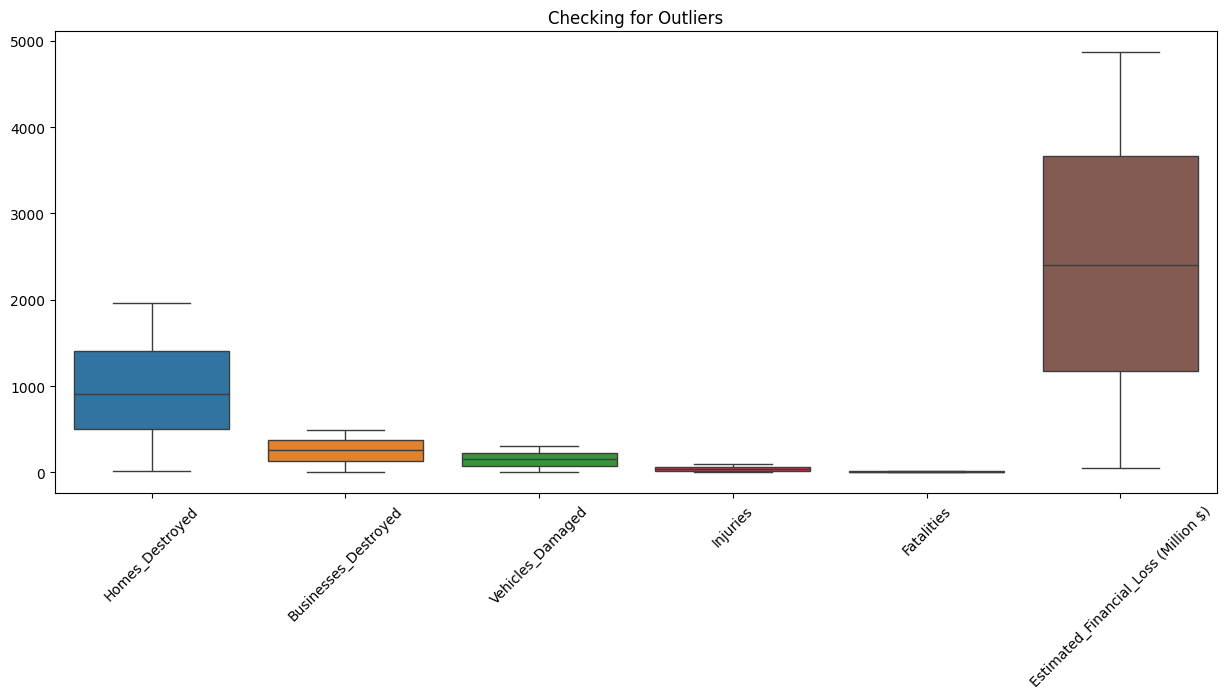

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15,6))
sns.boxplot(data=df[['Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged', 'Injuries', 'Fatalities', 'Estimated_Financial_Loss (Million $)']])
plt.xticks(rotation=45)
plt.title("Checking for Outliers")
plt.show()

In [17]:
# no outliers found

In [18]:
# Checking for skewness
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

skewed_features = df[['Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged', 'Injuries', 'Fatalities', 'Estimated_Financial_Loss (Million $)']].skew()
print(skewed_features)


Area_Burned (Acres)                    -0.089098
Homes_Destroyed                         0.153759
Businesses_Destroyed                   -0.053937
Vehicles_Damaged                        0.053359
Injuries                                0.525352
Fatalities                             -0.035151
Estimated_Financial_Loss (Million $)   -0.044449
dtype: float64


In [19]:
# features show moderate skewness

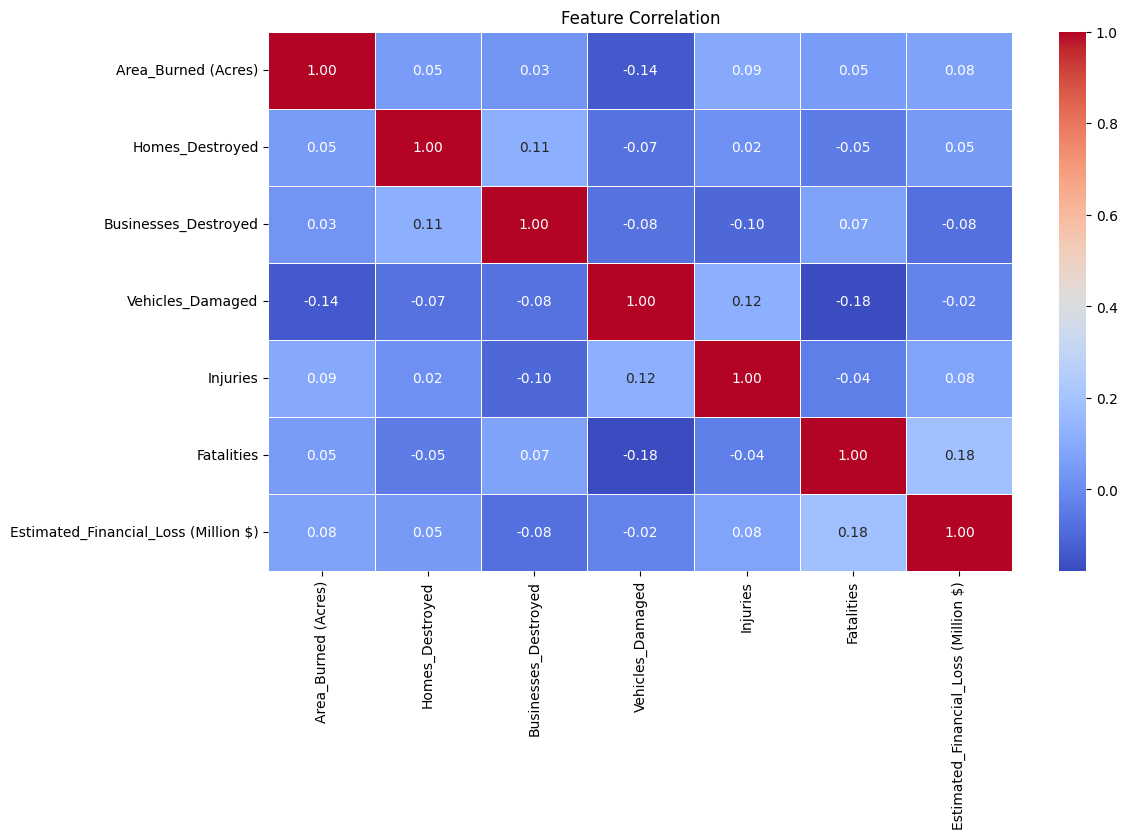

In [20]:
corr_matr = df[['Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged', 'Injuries', 'Fatalities', 'Estimated_Financial_Loss (Million $)']].corr()

plt.figure(figsize=(12,7))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

In [21]:
# features are seemingly uncorrelated

In [22]:
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020,11
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning,2021,9
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity,2022,2
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown,2021,5
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown,2021,9
